In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as scp 

# Energy conservation of a mass on a spring

## Suppose we have a mass $m$ attached to a horizontal spring with constant $k$ and slides without friction.

In [20]:
%matplotlib inline
import ipywidgets as ipyw 

Amp = 2 
Mass = 2 
k = 5

#defining my function for the position of the mass according to the formula we derived
def position(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    x_of_t = amplitude*np.cos(omega*t)
    
    return x_of_t

def velocity(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    v_of_t = -omega*amplitude*np.sin(omega*t)
    
    return v_of_t

def Kinetic(t,mass, K, amplitude): 
    
    K = 0.5*mass*velocity(t,mass, K, amplitude)**2
    
    return K

def Potential(t,mass, K, amplitude): 
    
    K = 0.5*K*position(t,mass, K, amplitude)**2
    
    return K

#defining a function which will update the position function based on the value of the mass and spring constant
def plotEnergy_with_slider(time = 0): 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi = 120)
    
    x = position(time, Mass, k, Amp)
    v = velocity(time, Mass, k, Amp)
    Kin = Kinetic(time, Mass, k, Amp)
    Us = Potential(time, Mass, k, Amp)
    
    
    tvals = np.linspace(0, 10, int(10/0.01))
    Xplot = position(tvals, Mass, k, Amp)
    ax1.plot(time, x, color = 'b', marker = 'o', markersize = 10)
    ax1.plot(tvals, Xplot, color = 'k')
    ax1.set(xlabel= r"$t$ [s]", ylabel = r"$x(t)$ [m]", title = 'Position over time')
    ax1.set(xlim =(-0.1, 10.1), ylim = (-2.1,2.1))
    
    Kplot, Uplot = Kinetic(tvals, Mass, k, Amp), Potential(tvals, Mass, k, Amp)
    ax2.plot(time, Kin, color = 'b', marker = 'o', markersize = 10)
    ax2.plot(time, Us, color = 'r', marker = 'o', markersize = 10)
    ax2.plot(tvals, Kplot, color = 'k', label = 'kinetic')
    ax2.plot(tvals, Uplot, color = 'grey', label = 'potential')
    ax2.set(xlabel= r"$t$ [s]", ylabel = r"$E$ [J]", title = 'Energy over time')
    ax2.set(xlim =(-0.1, 10.1), ylim = (-0.1,11))
    ax2.legend(loc = 'upper right')


interactive_plot = ipyw.interactive(plotEnergy_with_slider, time = (0, 6, 0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='time', max=6.0, step=0.01), Output()), _dom_classes=…

### Total value of kinetic and potential energy (sometimes called mechanical energy) does not as you move from one point to another. This makes the total energy a **constant of motion**

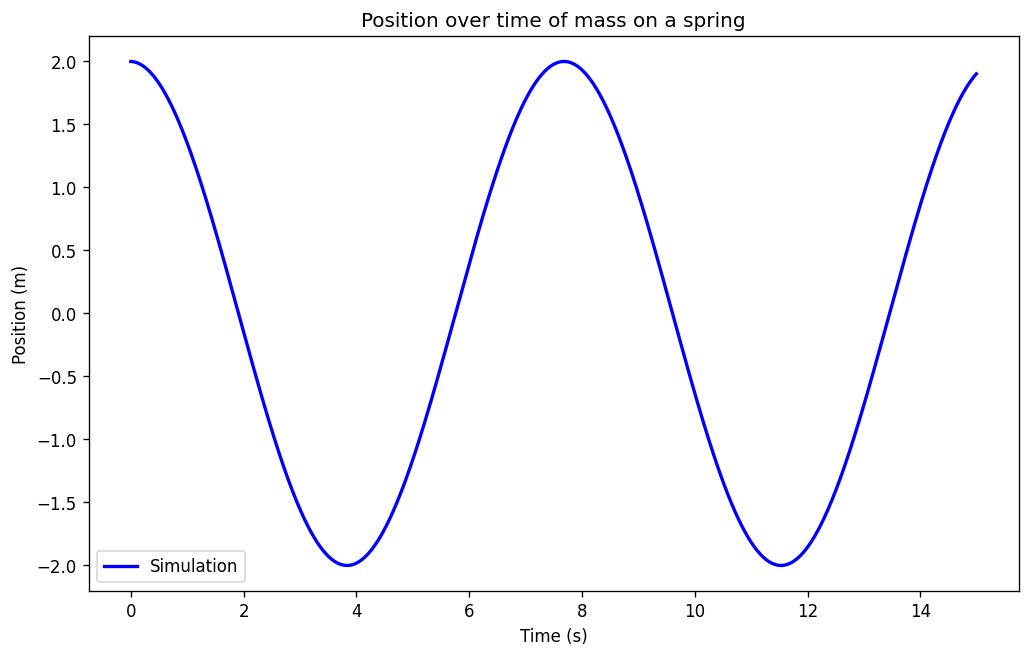

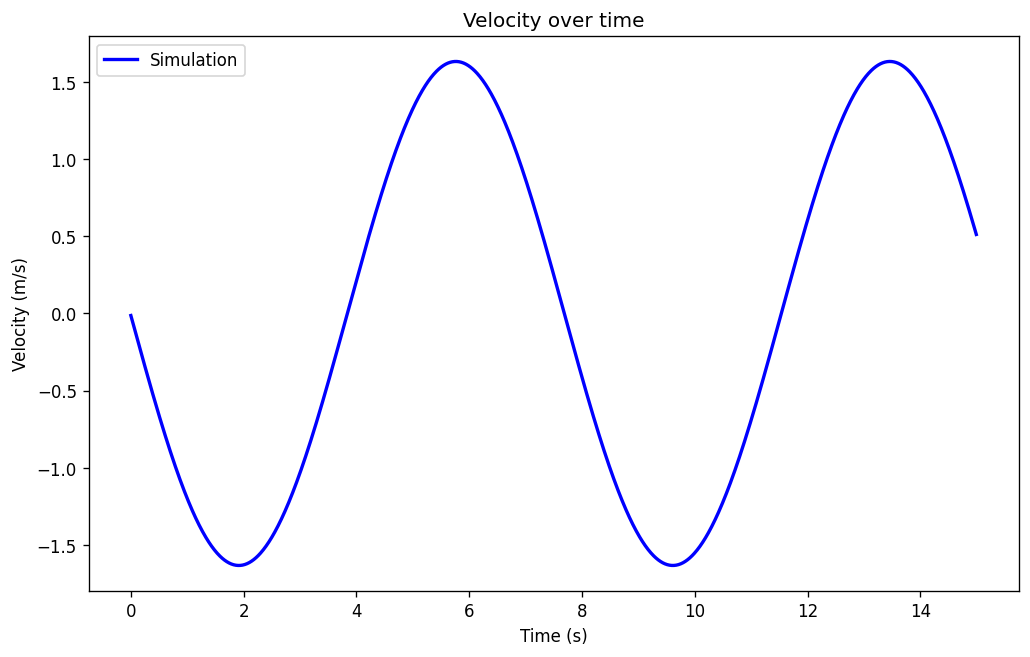

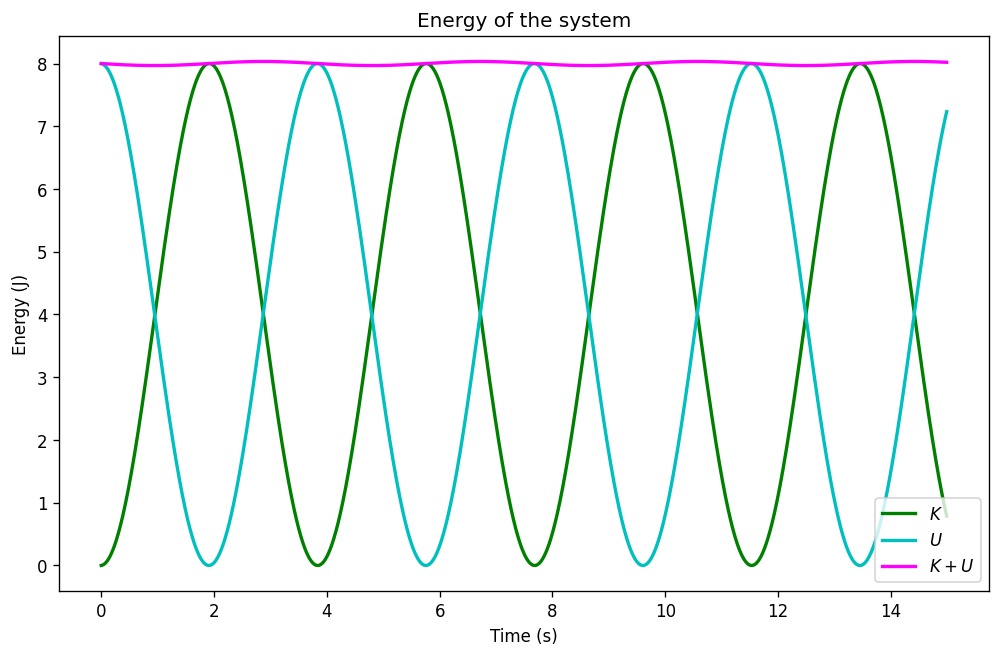

In [6]:
# length of the spring
xc = 0 
# distance from the rest position of the spring 
x0 = 2 
# initial velocity
v0 = 0 

# spring constant  = k, mass = m
k = 4 
m = 6 

# time I want the simulation to run
running_time = 15
# interval of time
dt = 0.01
#full list of time values
time_values = np.arange(0, running_time, dt)

#initial conditions
x_of_t = x0 
v_of_t = v0 
positions = np.array([])
velocities = np.array([])
potential_energy = np.array([])
kinetic_energy = np.array([])

for i in range(len(time_values)): 
    
    # use out differential equation, but with non-infinitesimal (i.e. finite) step size
    acceleration = -(k/m)*x_of_t 
    
    v_of_t = v_of_t + (acceleration*dt)
    velocities = np.append(velocities, v_of_t)
    K = 0.5*m*(v_of_t**2)
    kinetic_energy = np.append(kinetic_energy, K)
    
    x_of_t = x_of_t + (v_of_t*dt) 
    positions = np.append(positions, x_of_t)
    U = 0.5*k*(x_of_t**2)
    potential_energy = np.append(potential_energy, U)
    
plt.figure(figsize=(10, 6), dpi = 120)
plt.plot(time_values, positions, color = 'b', lw = 2, label = "Simulation")
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position over time of mass on a spring')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6), dpi = 120)
plt.plot(time_values, velocities, color = 'b', lw = 2, label = "Simulation")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity over time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6), dpi = 120)
plt.plot(time_values, kinetic_energy, color = 'g', lw = 2, label = "$K$")
plt.plot(time_values, potential_energy, color = 'c', lw = 2, label = "$U$")
plt.plot(time_values, potential_energy+kinetic_energy, color = 'magenta', lw = 2, label = "$K+U$")
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of the system')
plt.legend()
plt.show()